# Case Study: How Does a Bike-Share Navigate Speedy Success?

This case study investigates the 12 months bike-share trip data. The key objective is to understand how casual riders and annual members use Cyclistic bikes differently. With these insights, the company could work on converting casual riders into members, which is crucial for the company's future success.

## Data Cleaning

This notebook works on exploratory data assessment and data cleaning. The source data contains 12 files in the folder. 

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import timedelta
import glob

os.getcwd()

'C:\\Projects\\google-data-analytics-cert\\capstone project'

In [2]:
path = "./data" # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.877726,-87.654787,41.888716,-87.644448,member
1,158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.910000,-87.700000,member
2,5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,NaN,NaN,NaN,NaN,41.910000,-87.690000,41.930000,-87.700000,member
3,BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.910000,-87.700000,member
4,69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,-87.590000,member


In [4]:
frame.shape

(5479096, 13)

There is no duplicated row found.

In [5]:
frame[frame.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


Convert time string to datetime data type, calculate trip time duration and the day of week.

In [6]:
df = frame
df["started_at"] = pd.to_datetime(df["started_at"], infer_datetime_format=True) 
df["ended_at"] = pd.to_datetime(df["ended_at"], infer_datetime_format=True) 
df["duration"] = df["ended_at"] - df["started_at"]
df["day_of_week"] = df["started_at"].dt.dayofweek+1

In [7]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,day_of_week
0,70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.877726,-87.654787,41.888716,-87.644448,member,00:10:37,7
1,158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.910000,-87.700000,member,00:07:04,5
2,5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,NaN,NaN,NaN,NaN,41.910000,-87.690000,41.930000,-87.700000,member,00:06:55,2
3,BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.910000,-87.700000,member,00:05:53,2
4,69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,-87.590000,member,00:02:42,2


Trip duration ranges from -1 day to 38 days. Negative duration is not meaningful in the real life. Therefore, the trip record rows with zero or negative duration are eliminated from the study.

In [8]:
max(df["duration"]), min(df["duration"])

(Timedelta('38 days 20:24:09'), Timedelta('-21 days +19:50:02'))

In [8]:
zero = timedelta(0)
df = df[df["duration"]>zero]
df.shape

(5478022, 15)

In [23]:
counts = df[["ride_id", "member_casual"]].groupby(["member_casual"]).count()
data = counts[["ride_id"]].values.reshape(-1)
data

array([2488929, 2989093], dtype=int64)

In [24]:
avg_df = df[["duration", "member_casual"]]
avg_df["duration_min"] = np.round(df["duration"].dt.total_seconds().div(60),2)
avg_df.drop(["duration"],axis=1,inplace=True)
avg_df = avg_df[[avg_df.columns[1], avg_df.columns[0]]]
avg = avg_df.groupby(["member_casual"]).mean()
avg

C:\Users\zhangsy1\Anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,duration_min
member_casual,
casual,32.182046
member,13.760976


Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

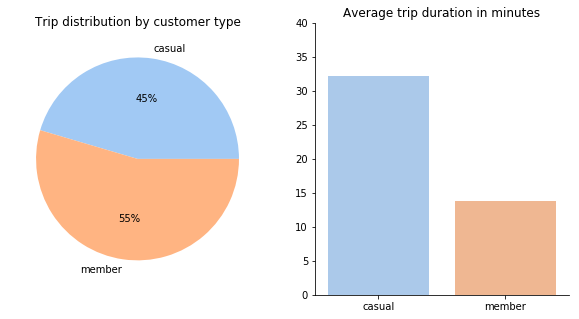

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

fig,axes=plt.subplots(1,2,figsize=(10,5))

#create pie chart
# plt.figure(figsize=(10,5))
axes[0].pie(data, labels = counts.index, colors = colors, autopct='%.0f%%')
axes[0].title.set_text("Trip distribution by customer type")
sns.barplot(x=avg.index,y=avg["duration_min"],ax=axes[1],palette='pastel')
axes[1].title.set_text("Average trip duration in minutes")
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_ylim(0,40)
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)
plt.show()

In [12]:
data = df[["duration", "member_casual"]]
data["duration_min"] = np.round(df["duration"].dt.total_seconds().div(60),2)
data.drop(["duration"],axis=1,inplace=True)
data = data[[data.columns[1], data.columns[0]]]
data.head()

C:\Users\zhangsy1\Anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zhangsy1\Anaconda3\envs\pytorchenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,duration_min,member_casual
0,10.62,member
1,7.07,member
2,6.92,member
3,5.88,member
4,2.70,member


C:\Users\zhangsy1\Anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


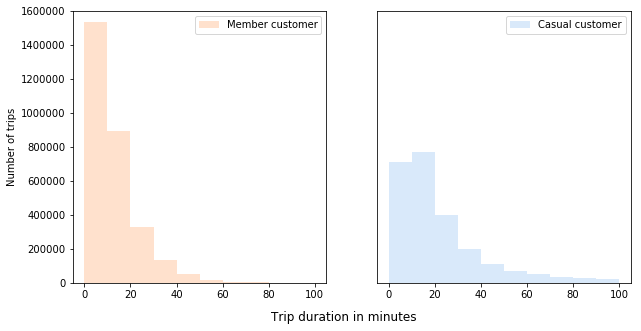

In [13]:
%matplotlib inline

fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.distplot(data[data["member_casual"]=="member"]["duration_min"], bins=[10*x for x in range(11)], kde=False, ax=axes[0], color=colors[1], label="Member customer")
axes[0].set_ylim(0, 1600000)
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of trips')
axes[0].legend(loc="upper right")
sns.distplot(data[data["member_casual"]=="casual"]["duration_min"], bins=[10*x for x in range(11)], kde=False, ax=axes[1], color=colors[0], label="Casual customer")
axes[1].set_ylim(0, 1600000)
axes[1].set_xlabel('')
axes[1].legend(loc="upper right")
axes[1].get_yaxis().set_ticks([])
fig.text(0.4, 0.02, "Trip duration in minutes", fontsize=12)
fig.show()

In [14]:
df_week = df[["ride_id", "member_casual", "day_of_week"]]
member_week = df_week[df_week["member_casual"]=="member"].groupby(["day_of_week"]).count()
casual_week = df_week[df_week["member_casual"]=="casual"].groupby(["day_of_week"]).count()
member_week

,ride_id,member_casual
day_of_week,,
1,407597,407597
2,460477,460477
3,460728,460728
4,433066,433066
5,429301,429301
6,425438,425438
7,372486,372486


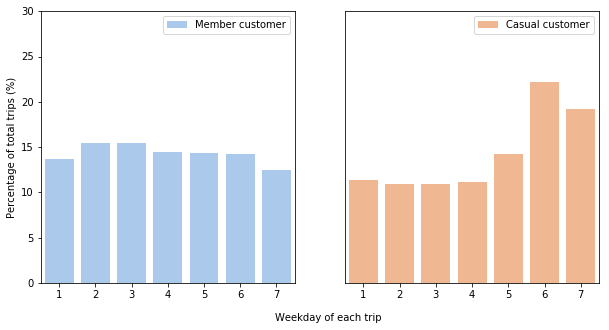

In [15]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x=member_week.index, y=member_week["ride_id"]*100/np.sum(member_week["ride_id"]),ax=axes[0],color=colors[0],label="Member customer")
axes[0].set_ylim(0, 30)
axes[0].set_ylabel('Percentage of total trips (%)')
axes[0].set_xlabel('')
axes[0].legend(loc="upper right")
sns.barplot(x=casual_week.index, y=casual_week["ride_id"]*100/np.sum(casual_week["ride_id"]),ax=axes[1],color=colors[1],label="Casual customer")
axes[1].set_ylim(0, 30)
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].get_yaxis().set_ticks([])
axes[1].legend(loc="upper right")
fig.text(0.45, 0.02, "Weekday of each trip", fontsize=10)
fig.show()


In [16]:
data = frame[["duration","member_casual","day_of_week"]]
data["duration_min"] = np.round(df["duration"].dt.total_seconds().div(60),2)
data.drop(["duration"],axis=1,inplace=True)

m_avg_d = data[data["member_casual"]=="member"].groupby(["day_of_week"]).mean()
c_avg_d = data[data["member_casual"]=="casual"].groupby(["day_of_week"]).mean()

C:\Users\zhangsy1\Anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


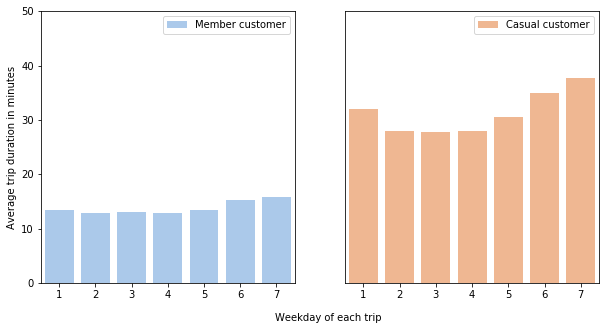

In [17]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x=m_avg_d.index, y=m_avg_d["duration_min"],ax=axes[0],color=colors[0],label="Member customer")
axes[0].set_ylim(0, 50)
axes[0].set_ylabel('Average trip duration in minutes')
axes[0].set_xlabel('')
axes[0].legend(loc="upper right")
sns.barplot(x=c_avg_d.index, y=c_avg_d["duration_min"],ax=axes[1],color=colors[1],label="Casual customer")
axes[1].set_ylim(0, 50)
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].get_yaxis().set_ticks([])
axes[1].legend(loc="upper right")
fig.text(0.45, 0.02, "Weekday of each trip", fontsize=10)
fig.show()


In [18]:
ride_type_m = frame[frame["member_casual"]=="member"].groupby("rideable_type").count()["ride_id"]
ride_type_m = ride_type_m/np.sum(ride_type_m)*100
ride_type_c = frame[frame["member_casual"]=="casual"].groupby("rideable_type").count()["ride_id"]
ride_type_c = ride_type_c/np.sum(ride_type_c)*100

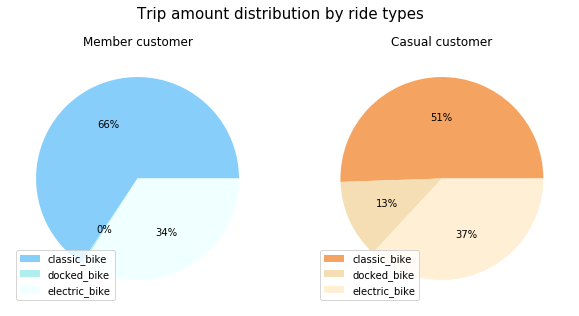

In [54]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].pie(ride_type_m, colors = ["lightskyblue","paleturquoise","azure"], autopct='%.0f%%')
axes[0].set_title("Member customer")
axes[0].legend(ride_type_m.index,loc="lower left")
axes[1].pie(ride_type_c,colors = ["sandybrown","wheat","papayawhip"], autopct='%.0f%%')
axes[1].set_title("Casual customer")
axes[1].legend(ride_type_c.index,loc="lower left")
plt.suptitle("Trip amount distribution by ride types", fontsize=15)
plt.show()

In [57]:
df_month = frame[["ride_id","started_at","member_casual"]]
df_month["month"] = df_month["started_at"].dt.month
df_month.head()

C:\Users\zhangsy1\Anaconda3\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ride_id,started_at,member_casual,month
0,70B6A9A437D4C30D,2020-12-27 12:44:29,member,12
1,158A465D4E74C54A,2020-12-18 17:37:15,member,12
2,5262016E0F1F2F9A,2020-12-15 15:04:33,member,12
3,BE119628E44F871E,2020-12-15 15:54:18,member,12
4,69AF78D57854E110,2020-12-22 12:08:17,member,12


In [62]:
counts = df_month.groupby(["member_casual","month"]).count()["ride_id"]
counts

member_casual  month
casual         1         18117
               2         10131
               3         84033
               4        136601
               5        256916
               6        370681
               7        442056
               8        412671
               9        363890
               10       257242
               11       106929
               12        30080
member         1         78717
               2         39491
               3        144463
               4        200629
               5        274717
               6        358914
               7        380354
               8        391681
               9        392257
               10       373984
               11       253049
               12       101493
Name: ride_id, dtype: int64

12 12


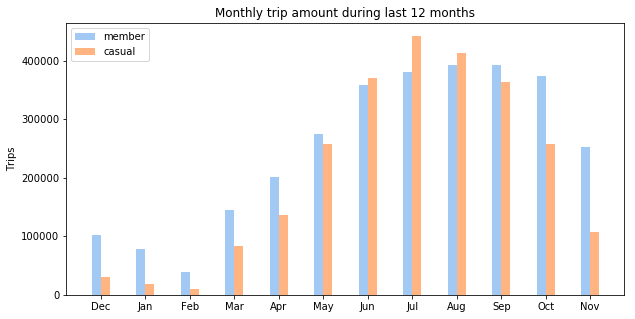

In [131]:
casual = np.concatenate([counts.values[11:12],counts.values[:11]])
member = np.concatenate([counts.values[23:24],counts.values[12:23]])
print(len(casual),len(member))
month = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]

y1 = member
y2 = casual

x = np.arange(len(y1))
width = 0.20

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
plt.title('Monthly trip amount during last 12 months')
# plt.xlabel('Parameters')
plt.ylabel('Trips')
axes.bar(x, y1, width=-1.*width, align='edge', label="member", color=colors[0])
axes.bar(x, y2, width=width, align='edge', color=colors[1], label="casual")
axes.set_xticks(x)
axes.set_xticklabels(month)
plt.legend(loc="upper left")
plt.show()
